# **📌 Exercise: Complete the Dataset Class for Water Body Segmentation**

## **🌍 Dataset Overview**
This dataset contains **satellite images** of landscapes along with their corresponding **segmentation masks**.  
- **Images**: Show various terrains, some containing water bodies.  
- **Masks**: Binary images where **white pixels** represent water and **black pixels** represent non-water areas.  

Your task is to **complete the custom Dataset class** to handle loading and preprocessing of these images and masks.

---

## **✅ Task**
1️⃣ Extract **image paths** and **mask paths** from the dataset folder.  
2️⃣ Complete the **custom Dataset class** by filling in the `__init__`, `__len__`, and `__getitem__` methods.  
3️⃣ Ensure the dataset:
   - Loads an image and its corresponding mask.
   - Applies **transformations** to standardize image sizes and formats.
   - Returns the **image-mask pair** when indexed.
4️⃣ **Test** your dataset class by loading a sample and displaying the image and mask.

---

In [1]:
# Please uncomment this out when you are running this lab on google colab!
import os

# Set KaggleHub cache to a directory inside /content/
os.environ["KAGGLEHUB_CACHE"] = "/content/data"

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("franciscoescobar/satellite-images-of-water-bodies")

print("Path to dataset files:", path)

100%|██████████| 247M/247M [00:10<00:00, 25.3MB/s]

Extracting files...


Path to dataset files: /content/data/datasets/franciscoescobar/satellite-images-of-water-bodies/versions/2


In [4]:
import os
import glob
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms

class WaterBodyDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, target_transform=None):
        self.image_paths = glob.glob(os.path.join(image_dir, "*.jpg"))  # Get all image paths
        self.mask_paths = glob.glob(os.path.join(mask_dir, "*.jpg"))  # Get all mask paths

        self.image_paths.sort()  # Why do we sort?👀👀👀
        self.mask_paths.sort()

        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # 🔹 Load the image and mask
        image = Image.open(self.image_paths[idx]).convert("RGB")
        mask = Image.open(self.mask_paths[idx]).convert("L")
        # ⬆️ What if we have a multiclass segmentation task with 5 classes?
        #     Should we convert the mask to 5 channels?👀👀👀
        #mask = torch.tensor(np.array(mask), dtype=torch.long)  # Shape: (H, W) + delete the convert("L") above
        #num_classes = 5
        #mask = torch.nn.functional.one_hot(mask, num_classes=num_classes).permute(2, 0, 1)  # Shape: (C, H, W)
        # 🔹 Apply transformations for image
        if self.transform:
            image = self.transform(image)

        # 🔹 Apply transformations for mask
        if self.target_transform:
            mask = self.target_transform(mask)

        return image, mask  # Return image-mask pair

In [5]:
train_image_dir = os.path.join(path, "Water Bodies Dataset", "Images")
train_mask_dir = os.path.join(path, "Water Bodies Dataset", "Masks")

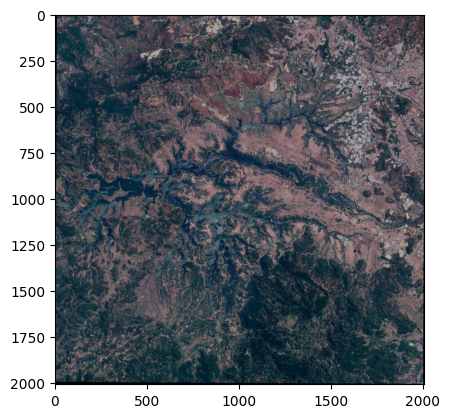

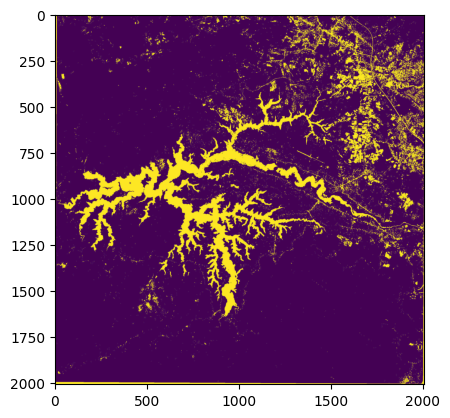

In [9]:
import matplotlib.pyplot as plt
train_dataset = WaterBodyDataset(train_image_dir, train_mask_dir)
# Show one image
image, mask = train_dataset[0]
plt.imshow(image)
plt.show()
plt.imshow(mask)
plt.show()